In [1]:
%matplotlib inline
from preamble import *

# Modelos Lineales generalizados para Clasificación: regresión logística

## 1. Analizando el impacto de C y de las penalizaciones (L1 y L2)

#### Usando el C por defecto (C = 1.0)

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.955
Test set score: 0.958


#### Valores similares sobre el training y testing set $\rightarrow$ probable sub-ajuste. 
Elevamos el valor de C para tener menos regularización (coeficientes más altos) y lograr modelos más flexibles (y ajustados)

In [3]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.972
Test set score: 0.965


El uso de C = 100 da como resultado una mayor precisión en el conjunto de entrenamiento y también una leve mejora en el de test, 
confirmando nuestra intuición de que un modelo más complejo tendria un mejor desempeño.

Veamos qué sucede con un modelo más regularizado (C más bajo, C=0.01), es decir coeficientes más cercanos a 0. 


In [4]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.934
Test set score: 0.930


Como era de esperarse, una mayor regularización genera un mayor sub-ajuste y se deteriora el desempeño tanto en el conjunto de entrenamiento como el de test en relación con el parámetro por defecto.

Finalmente, demos un vistazo a los coeficientes aprendidos por los modelos con las tres configuraciones diferentes
del parámetro de regularización C:

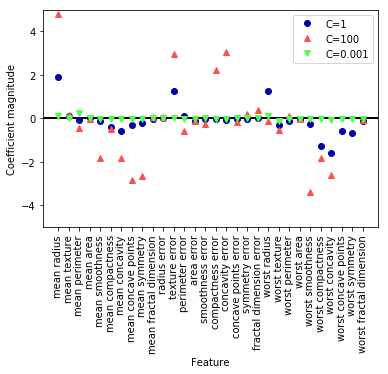

In [5]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

Si deseamos un modelo más interpretable, el uso de la regularización L1 podría ayudar, ya que limita el modelo a usar sólo algunas características. A continación se grafican los valores de los coeficientes y la accuracy obtenida con la regularización L1 para los distintos C.

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


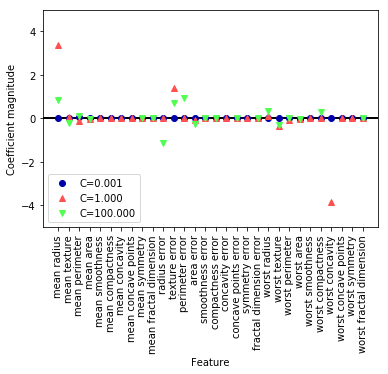

In [6]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")

plt.ylim(-5, 5)
plt.legend(loc=3)

### 1.b L1 Penalidad y poca densidad (sparsity) en Regresión Logística 

Comparación del nivel de raleza (sparsity) (porcentaje de coeficientes igual a cero) de las soluciones cuando se utilizan la penalización de L1 y L2 para diferentes valores de C. Podemos ver que los valores grandes de C dan más libertad al modelo. Por el contrario, los valores más pequeños de C restringen más el modelo. En el caso de penalización de L1, esto conduce a soluciones más dispersas (ralas).

Clasificamos imágenes de dígitos de 8x8 en dos clases: 0-4 contra 5-9. La visualización muestra los coeficientes de los modelos al variar C.



C=1.00
Sparsity with L1 penalty: 4.69%
score with L1 penalty: 0.9093
Sparsity with L2 penalty: 4.69%
score with L2 penalty: 0.9037
C=0.10
Sparsity with L1 penalty: 28.12%
score with L1 penalty: 0.9009
Sparsity with L2 penalty: 4.69%
score with L2 penalty: 0.9021
C=0.01
Sparsity with L1 penalty: 84.38%
score with L1 penalty: 0.8620
Sparsity with L2 penalty: 4.69%
score with L2 penalty: 0.8898


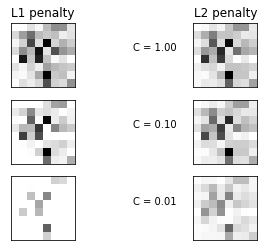

In [7]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

digits = datasets.load_digits()

X, y = digits.data, digits.target
X = StandardScaler().fit_transform(X)

# classify small against large digits
y = (y > 4).astype(np.int)


# Set regularization parameter
for i, C in enumerate((1, 0.1, 0.01)):
    # turn down tolerance for short training time
    clf_l1_LR = LogisticRegression(C=C, penalty='l1', tol=0.01, solver='saga')
    clf_l2_LR = LogisticRegression(C=C, penalty='l2', tol=0.01, solver='saga')
    clf_l1_LR.fit(X, y)
    clf_l2_LR.fit(X, y)

    coef_l1_LR = clf_l1_LR.coef_.ravel()
    coef_l2_LR = clf_l2_LR.coef_.ravel()

    # coef_l1_LR contains zeros due to the
    # L1 sparsity inducing norm

    sparsity_l1_LR = np.mean(coef_l1_LR == 0) * 100
    sparsity_l2_LR = np.mean(coef_l2_LR == 0) * 100

    print("C=%.2f" % C)
    print("Sparsity with L1 penalty: %.2f%%" % sparsity_l1_LR)
    print("score with L1 penalty: %.4f" % clf_l1_LR.score(X, y))
    print("Sparsity with L2 penalty: %.2f%%" % sparsity_l2_LR)
    print("score with L2 penalty: %.4f" % clf_l2_LR.score(X, y))

    l1_plot = plt.subplot(3, 2, 2 * i + 1)
    l2_plot = plt.subplot(3, 2, 2 * (i + 1))
    if i == 0:
        l1_plot.set_title("L1 penalty")
        l2_plot.set_title("L2 penalty")

    l1_plot.imshow(np.abs(coef_l1_LR.reshape(8, 8)), interpolation='nearest',
                   cmap='binary', vmax=1, vmin=0)
    l2_plot.imshow(np.abs(coef_l2_LR.reshape(8, 8)), interpolation='nearest',
                   cmap='binary', vmax=1, vmin=0)
    plt.text(-8, 3, "C = %.2f" % C)

    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l2_plot.set_xticks(())
    l2_plot.set_yticks(())

plt.show()

## 2. Regresión Logística y clasificación Multiclase

Como se vió en teoría, la regresión logística estandard está pensada para problemas binarios. Cuando se tienen más de dos clases se debe recurrir a la variante multinomial (en su versión "softmax") o bien descomponer el prolema multiclase en varios problemas binarios usando un enfoque como "one-vs-rest" (ovr). Esta sección analiza las dos variantes visualizando en primer lugar las superficies de decisión que generan ambos enfoques y luego analizando el desempeño de los mismos sobre el data set 20NewsGroup


### 2.a Visualizando la regresión logística multinomial y la "One-vs-Rest" 


training score : 0.995 (multinomial)
training score : 0.976 (ovr)


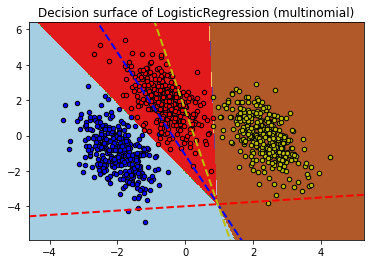

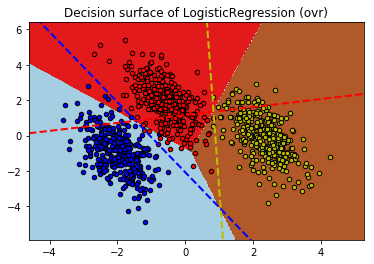

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression

# make 3-class dataset for classification
centers = [[-5, 0], [0, 1.5], [5, -1]]
X, y = make_blobs(n_samples=1000, centers=centers, random_state=40)
transformation = [[0.4, 0.2], [-0.4, 1.2]]
X = np.dot(X, transformation)

for multi_class in ('multinomial', 'ovr'):
    clf = LogisticRegression(solver='sag', max_iter=100, random_state=42,
                             multi_class=multi_class).fit(X, y)

    # print the training scores
    print("training score : %.3f (%s)" % (clf.score(X, y), multi_class))

    # create a mesh to plot in
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.title("Decision surface of LogisticRegression (%s)" % multi_class)
    plt.axis('tight')

    # Plot also the training points
    colors = "bry"
    for i, color in zip(clf.classes_, colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired,
                    edgecolor='black', s=20)

    # Plot the three one-against-all classifiers
    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()
    coef = clf.coef_
    intercept = clf.intercept_

    def plot_hyperplane(c, color):
        def line(x0):
            return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]
        plt.plot([xmin, xmax], [line(xmin), line(xmax)],
                 ls="--", color=color)

    for i, color in zip(clf.classes_, colors):
        plot_hyperplane(i, color)

plt.show()

### 2.b Regresión Logística Multiclase con datos ralos de 20newgroups

Ahora comparamos la regresión logística multinomial L1 frente a la regresión logística L1 o-v-r para clasificar los documentos del conjunto de datos 20newgroups. La regresión logística multinomial produce resultados más precisos y es más rápida de entrenar en el conjunto de datos a escala más grande.

Aquí usamos la penalización l1 (propensa a generar datos ralos) que reduce a cero los pesos de las características no informativas. Esto es bueno si el objetivo es extraer el vocabulario altamente discriminativo de cada clase. Si el objetivo es obtener la mejor precisión predictiva, es mejor utilizar la penalización l2 que no induce tal dispersión en los datos.

Una forma más tradicional (y posiblemente mejor) de predecir sobre un subconjunto disperso de características de entrada sería usar una selección de características univariadas seguida de un modelo de regresión logística tradicional (penalizado por l2).


Dataset 20newsgroup, train_samples=9000, n_features=130107, n_classes=20
[model=One versus Rest, solver=saga] Number of epochs: 1


C:\Users\Marcelo\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[model=One versus Rest, solver=saga] Number of epochs: 3
Test accuracy for model ovr: 0.7410
% non-zero coefficients for model ovr, per class:
 [0.271 0.663 0.804 0.732 0.677 0.735 0.409 0.49  1.013 0.563 0.601 0.333
 0.709 0.851 0.569 0.657 0.644 0.812 0.443 0.411]
Run time (3 epochs) for model ovr:3.65
[model=Multinomial, solver=saga] Number of epochs: 1
[model=Multinomial, solver=saga] Number of epochs: 3
[model=Multinomial, solver=saga] Number of epochs: 7
Test accuracy for model multinomial: 0.7450
% non-zero coefficients for model multinomial, per class:
 [0.133 0.118 0.133 0.14  0.127 0.161 0.152 0.091 0.078 0.121 0.149 0.108
 0.188 0.125 0.168 0.218 0.116 0.078 0.069 0.156]
Run time (7 epochs) for model multinomial:4.84
Example run in 14.384 s


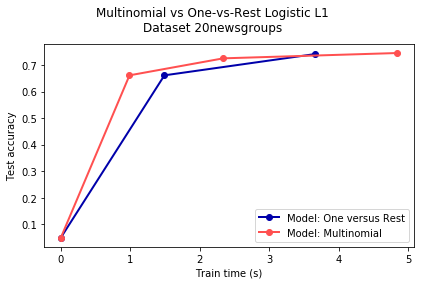

In [9]:
import time

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_20newsgroups_vectorized
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

t0 = time.clock()

# We use SAGA solver
solver = 'saga'

# Turn down for faster run time
n_samples = 10000

# Memorized fetch_rcv1 for faster access
dataset = fetch_20newsgroups_vectorized('all')
X = dataset.data
y = dataset.target
X = X[:n_samples]
y = y[:n_samples]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=42,
                                                    stratify=y,
                                                    test_size=0.1)
train_samples, n_features = X_train.shape
n_classes = np.unique(y).shape[0]

print('Dataset 20newsgroup, train_samples=%i, n_features=%i, n_classes=%i'
      % (train_samples, n_features, n_classes))

models = {'ovr': {'name': 'One versus Rest', 'iters': [1, 3]},
          'multinomial': {'name': 'Multinomial', 'iters': [1, 3, 7]}}

for model in models:
    # Add initial chance-level values for plotting purpose
    accuracies = [1 / n_classes]
    times = [0]
    densities = [1]

    model_params = models[model]

    # Small number of epochs for fast runtime
    for this_max_iter in model_params['iters']:
        print('[model=%s, solver=%s] Number of epochs: %s' %
              (model_params['name'], solver, this_max_iter))
        lr = LogisticRegression(solver=solver,
                                multi_class=model,
                                C=1,
                                penalty='l1',
                                fit_intercept=True,
                                max_iter=this_max_iter,
                                random_state=42,
                                )
        t1 = time.clock()
        lr.fit(X_train, y_train)
        train_time = time.clock() - t1

        y_pred = lr.predict(X_test)
        accuracy = np.sum(y_pred == y_test) / y_test.shape[0]
        density = np.mean(lr.coef_ != 0, axis=1) * 100
        accuracies.append(accuracy)
        densities.append(density)
        times.append(train_time)
    models[model]['times'] = times
    models[model]['densities'] = densities
    models[model]['accuracies'] = accuracies
    print('Test accuracy for model %s: %.4f' % (model, accuracies[-1]))
    print('%% non-zero coefficients for model %s, '
          'per class:\n %s' % (model, densities[-1]))
    print('Run time (%i epochs) for model %s:'
          '%.2f' % (model_params['iters'][-1], model, times[-1]))

fig = plt.figure()
ax = fig.add_subplot(111)

for model in models:
    name = models[model]['name']
    times = models[model]['times']
    accuracies = models[model]['accuracies']
    ax.plot(times, accuracies, marker='o',
            label='Model: %s' % name)
    ax.set_xlabel('Train time (s)')
    ax.set_ylabel('Test accuracy')
ax.legend()
fig.suptitle('Multinomial vs One-vs-Rest Logistic L1\n'
             'Dataset %s' % '20newsgroups')
fig.tight_layout()
fig.subplots_adjust(top=0.85)
run_time = time.clock() - t0
print('Example run in %.3f s' % run_time)
plt.show()


## 3. Estimación de parámetros usando "grid search" con validación-cruzada

Este ejemplo muestra cómo se optimiza un clasificador mediante validación cruzada utilizando el objeto :class: `sklearn.model_selection.GridSearchCV` en un conjunto de desarrollo que comprende sólo la mitad de los datos etiquetados disponibles.

El rendimiento de los hiper-parámetros seleccionados y el modelo entrenado se mide luego en un conjunto de evaluación dedicado que no se usó durante el paso de selección del modelo.


In [10]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

# Loading the Digits dataset
digits = datasets.load_digits()

# To apply an classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))
y = digits.target

# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=0)

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Note the problem is too easy: the hyperparameter plateau is too flat and the
# output model is the same for precision and recall with ties in quality.


# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set:

0.986 (+/-0.016) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.959 (+/-0.029) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.988 (+/-0.017) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.982 (+/-0.026) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.988 (+/-0.017) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.982 (+/-0.025) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.988 (+/-0.017) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.982 (+/-0.025) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.975 (+/-0.014) for {'C': 1, 'kernel': 'linear'}
0.975 (+/-0.014) for {'C': 10, 'kernel': 'linear'}
0.975 (+/-0.014) for {'C': 100, 'kernel': 'linear'}
0.975 (+/-0.014) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed o

# Ejercicio

Realice el mismo procedimiento de validación cruzada con "grid search" de la celda anterior pero utilizando en este caso un clasificador **LogisticRegression**. 

El parámetro 'C' deberá variar entre los siguientes valores: 0.001, 0.01, 0.1, 1, 10, 100 y 1000.

Usando un 'solver' del tipo 'newton-cg', la única penalidad ('penalty') que se probará será la 'l2' y al aspecto multi clase del problema será abordado tanto en su variante 'multinomial' como One vs Rest ('ovr').  

Usando un 'solver' del tipo 'liblinear', se probarán ambos penalidades ('l1' y 'l2') y al aspecto multi clase del problema sólo será abordado en su variante One vs Rest ('ovr').  
 

In [4]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Loading the Digits dataset
digits = datasets.load_digits()

n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))
y = digits.target

# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=0)

# Set the parameters for cross-validation
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
tuned_parameters = [{'solver': ['newton-cg'], 'penalty': ['l2'], 'C': C, 'multi_class':['multinomial', 'ovr']},
                    {'solver': ['liblinear'], 'penalty': ['l1', 'l2'], 'C': C, 'multi_class':['ovr']}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(LogisticRegression(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()


# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 0.1, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'newton-cg'}

Grid scores on development set:

0.945 (+/-0.033) for {'C': 0.001, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'newton-cg'}
0.943 (+/-0.025) for {'C': 0.001, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'newton-cg'}
0.969 (+/-0.029) for {'C': 0.01, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'newton-cg'}
0.966 (+/-0.037) for {'C': 0.01, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'newton-cg'}
0.963 (+/-0.029) for {'C': 0.1, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'newton-cg'}
0.969 (+/-0.025) for {'C': 0.1, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'newton-cg'}
0.963 (+/-0.031) for {'C': 1, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'newton-cg'}
0.963 (+/-0.022) for {'C': 1, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'newton-cg'}
0.961 (+/-0.026) fo